<a href="https://www.kaggle.com/code/yacharki/kaggle-grandmasters-by-country?scriptVersionId=218414817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Select Your Country = Top Kaggle Grandmasters on your Country 📊

**The Score: grandmaster = 8 master = 4 contributor = 2 expert = 1 novice = 0**

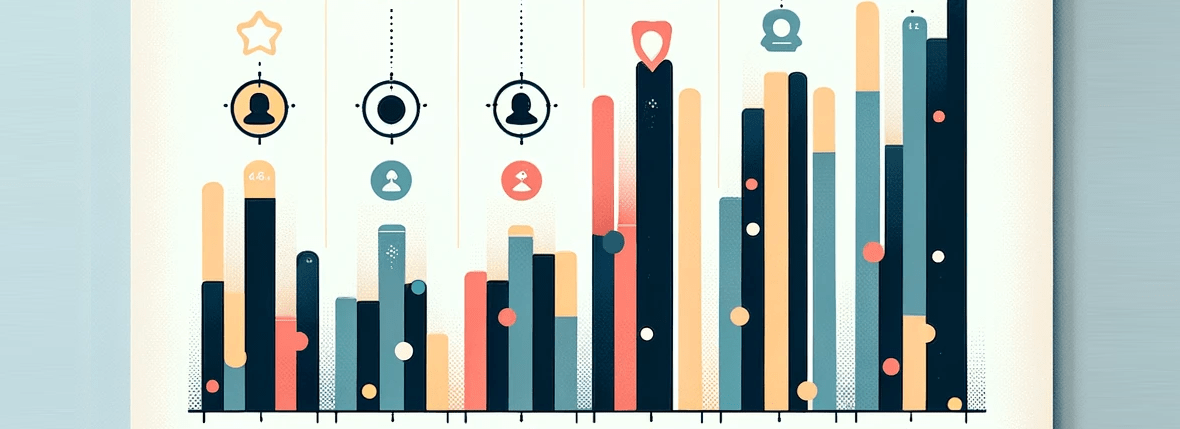

In [1]:
import pandas as pd
from ipywidgets import interact, Dropdown, Layout

# Load data
data = pd.read_csv('/kaggle/input/grandmasters-by-country-04302024/Grandmasters_by_Country.csv')

data = data.dropna(subset=['Country'])

# Mapping ranks to scores
rank_to_score = {
    'grandmaster': 8,
    'master': 2,
    'expert': 4,
    'contributor': 1,
    'novice': 0
}

# Apply scoring system across all rank columns and calculate total score
for rank_col in ['Competitions_Rank', 'Datasets_Rank', 'Notebooks_Rank', 'Discussion_Rank']:
    data[rank_col + '_Score'] = data[rank_col].map(rank_to_score)

data['Total_Score'] = data[['Competitions_Rank_Score', 'Datasets_Rank_Score', 'Notebooks_Rank_Score', 'Discussion_Rank_Score']].sum(axis=1)

# Define columns to display
columns_to_display = ['Username','Competitions_Rank', 'Datasets_Rank', 'Notebooks_Rank', 'Discussion_Rank']

# Function to filter top users by country based on total score
def filter_top_users_by_total_score(country):
    country_data = data[data['Country'] == country]
    # Sort by Total_Score in descending order and select only the relevant columns
    top_users = country_data.sort_values(by='Total_Score', ascending=False)[columns_to_display]
    return top_users

def display_formatted(df):
    try:
        # Attempt to hide the index using the updated Styler API if available
        return df.style.hide(axis='index').set_table_styles(
            [{
                'selector': 'th',
                'props': [('background-color', '#f4f4f4'), ('font-size', '14px'), ('text-align', 'center')]
            }]
        ).set_properties(**{
            'background-color': '#f9f9f9',
            'border-color': 'black',
            'border-width': '2px',
            'border-style': 'solid',
            'text-align': 'center',
            'font-size': '18px'
        })
    except AttributeError:
        # Fallback if hide(axis='index') is not available
        return df.style.set_table_styles(
            [{
                'selector': 'th',
                'props': [('background-color', '#f4f4f4'), ('font-size', '14px'), ('text-align', 'center')]
            }]
        ).set_properties(**{
            'background-color': '#f9f9f9',
            'border-color': 'black',
            'border-width': '2px',
            'border-style': 'solid',
            'text-align': 'center',
            'font-size': '16px'
        })

# Select your Country Here :


In [2]:
# Create an interactive dropdown for countries
@interact
def show_top_users_by_score(country=Dropdown(options=data['Country'].unique(),value='Morocco', description='Country',layout=Layout(width='800px', height='50px'))):
    top_users = filter_top_users_by_total_score(country)
    if not top_users.empty:
        display(display_formatted(top_users))
    else:
        print("No top users found in this country based on the general score.")

interactive(children=(Dropdown(description='Country', index=30, layout=Layout(height='50px', width='800px'), o…